# Konlpy를 활용한 단어빈도분석 및 Wordcloud

> ## 1) 한글 폰트 설치

- 나눔폰트 설치

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


- 설치 확인

In [3]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/u

In [4]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용됐는지 확인

Text(0.5, 1.0, '안녕')

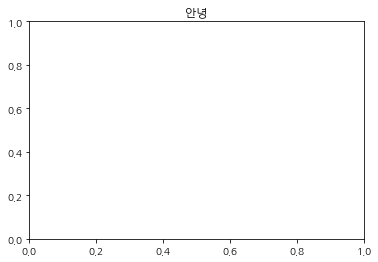

In [6]:
plt.title('안녕')

# 오류가 안뜨는걸로 봐서 적용은 된 것 같은데... 이상하다 뭐지
# 런타임 다시 시작해주니까 됐다

# 맨 처음 설치 후 런타임을 다시 시작해주어야 적용이 되는 듯

> ## 2) Konlpy와 wordcloud 설치

- konlpy, wordcloud 설치

In [5]:
!pip install konlpy wordcloud

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 460kB 47.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


- 텍스트파일 불러오기
  - one_off_conversation_happy_for_konlpy.txt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/one_off_conversation_happy_for_konlpy.txt'

-rw------- 1 root root 307319 Apr 12 01:43 '/content/drive/My Drive/Colab Notebooks/datasets/one_off_conversation_happy_for_konlpy.txt'


In [10]:
from konlpy.tag import Twitter
from collections import Counter

In [12]:
# 왼쪽 파일에 텍스트 파일 올려 놓고 불러올 수 있다.
file = open('one_off_conversation_happy_for_konlpy.txt','r')

lists = file.readlines()

file.close()

lists

['오라버니 해피투게더 봤어요\n',
 '우리 모두 LG 선수들이 선전할 수 있게 기를 넣어줍시다\n',
 '웃긴 거 알죠\n',
 '덕분에 주방에서 요리하는 게 엄청 좋아졌어요\n',
 '마지막 순간 손가락으로 총을 만들어 쏘실 때에는 제가 직접 맞는 것 같습니다\n',
 '어떻게 여성 요리사보다 더 인기가 많으신지 저도 늘 반찬 만들 때 따라 하고 있답니다\n',
 '우리에게 맛있는 음식을 전하시는 맥주 부님 당신 멋져\n',
 '활동 혜택으로 오션월드 입장권 2매까지 주는 폴 인 러브\n',
 '그리고 100일도 축하해요\n',
 '응원합니다 그리고 사랑합니다 파이팅\n',
 '형님이 올해 우리 팀으로 온다고 해서 얼마나 기뻤는지 몰라요\n',
 '예 500일 축하해요\n',
 '생일 진심으로 축하해요\n',
 '축하\n',
 '요리가 차암쉽쥬\n',
 '10년 뒤 손 편지 쓰고 꼭 이 감회도 갈게요\n',
 '요리의 매력에 빠졌어요\n',
 '300일 너무너무 축하해요\n',
 '항상 밝은 에너지 덕분에 힘이 납니다\n',
 '대단하신 우리 선생님 파이팅요\n',
 '파이팅\n',
 '제일처럼 기쁘고 좋은데\n',
 '생일 축하해요\n',
 '덕분에 요리가 즐거워요\n',
 '800일 축하해요\n',
 '이런 오늘 신문을 보니 엘지가 올 시즌을 포기한다고 나왔더라고요\n',
 '내일 생일이라 한번 가보려고요\n',
 '너무너무 좋아요\n',
 '역시 프로입니다\n',
 '1위 한 것 너무 축하해요♡\n',
 '앞으로 언제나 함께 있을게요\n',
 '건강한 하루요\n',
 '하루에 2만 명 넘고 너무 좋겠네요\n',
 '7500일 축하해요\n',
 '축하드려요\n',
 '그게 훨씬 귀엽고 더 어려 보여요 진짜\n',
 '정말 행복해요\n',
 '딸 바보 되시겠네요\n',
 '파이팅\n',
 '파이팅\n',
 '항상 좋은 일 있길 바랄게요\n',
 '오빠의 유쾌한 웃음소리가 들리는듯하네요\n',
 '선수 파이팅\n',
 '매번 좋은 정보감사합니다\n',
 

- 형태소 분석기 나누기

In [13]:
twitter = Twitter() 
morphs = [] 
 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('오라버니', 'Noun'), ('해피투게더', 'Noun'), ('봤어요', 'Verb'), ('\n', 'Foreign')], [('우리', 'Noun'), ('모두', 'Noun'), ('LG', 'Alpha'), ('선수', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('선전', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있게', 'Adjective'), ('기를', 'Verb'), ('넣어', 'Verb'), ('줍시다', 'Verb'), ('\n', 'Foreign')], [('웃긴', 'Verb'), ('거', 'Noun'), ('알', 'Noun'), ('죠', 'Josa'), ('\n', 'Foreign')], [('덕분', 'Noun'), ('에', 'Josa'), ('주방', 'Noun'), ('에서', 'Josa'), ('요리', 'Noun'), ('하는', 'Verb'), ('게', 'Noun'), ('엄청', 'Adverb'), ('좋아졌어요', 'Verb'), ('\n', 'Foreign')], [('마지막', 'Noun'), ('순간', 'Noun'), ('손가락', 'Noun'), ('으로', 'Josa'), ('총', 'Noun'), ('을', 'Josa'), ('만들어', 'Verb'), ('쏘실', 'Verb'), ('때', 'Noun'), ('에는', 'Josa'), ('제', 'Noun'), ('가', 'Josa'), ('직접', 'Noun'), ('맞는', 'Verb'), ('것', 'Noun'), ('같습니다', 'Adjective'), ('\n', 'Foreign')], [('어떻게', 'Adjective'), ('여성', 'Noun'), ('요리사', 'Noun'), ('보다', 'Josa'), ('더', 'Noun'), ('인기', 'Noun'), ('가', 'Josa'), ('많으', 'Adjective'), ('신지', 'Noun'), ('저'

- 명사만 골라내기

In [27]:
noun_list1=[] 
for sentence in morphs :
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word) and ("나" not in word): 
            noun_list1.append(word) 
print(noun_list1)


['오라버니', '해피투게더', '우리', '모두', '선수', '선전', '수', '거', '알', '덕분', '주방', '요리', '게', '마지막', '순간', '손가락', '총', '때', '제', '직접', '여성', '요리사', '더', '인기', '신지', '저', '늘', '반찬', '때', '우리', '음식', '전', '맥주', '부', '당신', '활동', '혜택', '오션월드', '입장권', '매', '폴', '인', '러브', '축하', '응원', '사랑', '파이팅', '형님', '올해', '우리', '팀', '예', '축하', '생일', '진심', '축하', '축하', '요리', '차암쉽쥬', '뒤', '손', '편지', '꼭', '이', '감회', '요리', '매력', '축하', '항상', '에너지', '덕분', '힘', '우리', '선생님', '파이팅', '파이팅', '제일', '생일', '축하', '덕분', '요리', '축하', '오늘', '신문', '엘지', '시즌', '포기', '생일', '한번', '역시', '프로', '위', '축하', '앞', '하루', '하루', '명', '축하', '축하', '그게', '더', '진짜', '정말', '딸', '바보', '파이팅', '파이팅', '항상', '일', '오빠', '웃음소리', '선수', '파이팅', '매번', '정보', '오늘', '이', '날', '오늘이', '바로', '세븐', '틴', '날', '대상', '수상', '축하', '생일', '진심', '축하', '세븐', '틴', '무한도전', '연기', '응원', '요즘', '세시', '울', '오빠', '일', '등', '신랑감', '꼭', '영화', '위', '님', '보고', '요리', '대해', '관심', '오빠', '생일', '축하', '일과', '카페', '진짜', '우리', '아저씨', '파이팅', '오늘', '콘서트', '숙소', '날씨', '일도', '우리', '모두', '파이팅', '응원', '외국', 

- 빈도수대로 정렬

In [28]:
count1 = Counter(noun_list1)
print(count1)

Counter({'축하': 359, '정말': 316, '진짜': 303, '거': 235, '파이팅': 193, '응원': 161, '항상': 161, '오늘': 158, '최고': 157, '오빠': 156, '선수': 153, '요리': 143, '수': 140, '연기': 136, '보고': 133, '우리': 131, '때': 130, '감사': 128, '모습': 121, '더': 104, '사람': 104, '이': 102, '듯': 100, '저': 98, '역시': 94, '생일': 91, '수고': 91, '안': 91, '게': 89, '생각': 81, '감동': 79, '사랑': 78, '진심': 78, '말': 74, '그': 74, '선생님': 70, '앞': 70, '일': 70, '지금': 70, '분': 70, '팬': 69, '국민': 69, '특검': 66, '대박': 65, '제': 62, '덕분': 61, '드라마': 60, '마음': 58, '대한민국': 57, '요': 55, '모두': 53, '이제': 53, '고생': 53, '존경': 53, '맥주': 52, '다시': 52, '음식': 51, '엘지': 51, '기사': 51, '위': 50, '전': 49, '부': 49, '또': 49, '어제': 49, '형': 49, '노래': 48, '배우': 48, '이번': 47, '경기': 47, '그냥': 47, '개': 46, '날': 44, '늘': 43, '당신': 43, '요즘': 43, '팀': 42, '알': 41, '댓글': 41, '기대': 41, '좀': 41, '형님': 40, '기분': 39, '방송': 39, '얼굴': 38, '중': 37, '줄': 37, '꼭': 36, '두': 36, '집': 36, '영화': 35, '볼': 35, '난': 35, '남자': 35, '백': 35, '매력': 34, '한번': 34, '대상': 34, '못': 34, '노력': 34, '레시피': 34,

In [29]:
# 위 셀과 같은 결과 
words1 = dict(count1.most_common())
print(words1)

{'축하': 359, '정말': 316, '진짜': 303, '거': 235, '파이팅': 193, '응원': 161, '항상': 161, '오늘': 158, '최고': 157, '오빠': 156, '선수': 153, '요리': 143, '수': 140, '연기': 136, '보고': 133, '우리': 131, '때': 130, '감사': 128, '모습': 121, '더': 104, '사람': 104, '이': 102, '듯': 100, '저': 98, '역시': 94, '생일': 91, '수고': 91, '안': 91, '게': 89, '생각': 81, '감동': 79, '사랑': 78, '진심': 78, '말': 74, '그': 74, '선생님': 70, '앞': 70, '일': 70, '지금': 70, '분': 70, '팬': 69, '국민': 69, '특검': 66, '대박': 65, '제': 62, '덕분': 61, '드라마': 60, '마음': 58, '대한민국': 57, '요': 55, '모두': 53, '이제': 53, '고생': 53, '존경': 53, '맥주': 52, '다시': 52, '음식': 51, '엘지': 51, '기사': 51, '위': 50, '전': 49, '부': 49, '또': 49, '어제': 49, '형': 49, '노래': 48, '배우': 48, '이번': 47, '경기': 47, '그냥': 47, '개': 46, '날': 44, '늘': 43, '당신': 43, '요즘': 43, '팀': 42, '알': 41, '댓글': 41, '기대': 41, '좀': 41, '형님': 40, '기분': 39, '방송': 39, '얼굴': 38, '중': 37, '줄': 37, '꼭': 36, '두': 36, '집': 36, '영화': 35, '볼': 35, '난': 35, '남자': 35, '백': 35, '매력': 34, '한번': 34, '대상': 34, '못': 34, '노력': 34, '레시피': 34, '제일': 3

- 워드 클라우드 만들기 

In [28]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [30]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

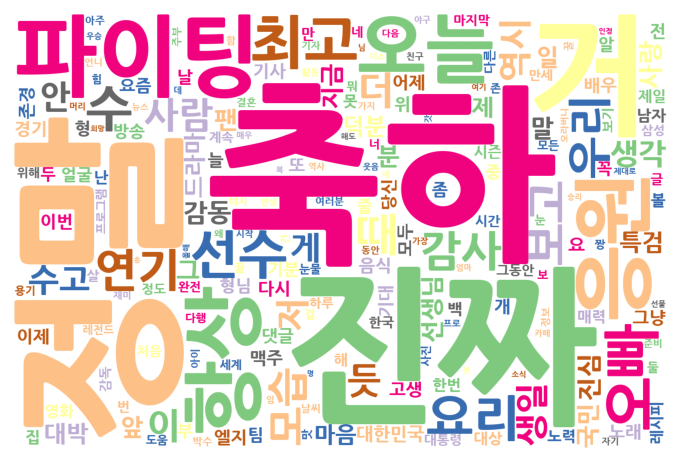

In [30]:
wordcloud1 = WordCloud(font_path = 'C:/Windows/Fonts/NanumGothicExtraBold.ttf', 
                       background_color='white',
                       colormap = "Accent_r", 
                       width=1500, 
                       height=1000).generate_from_frequencies(words1) 

plt.imshow(wordcloud1) 
plt.axis('off') 
plt.show()
# 내 ,나, 것을 제외했지만, 여전히 수, 거, 지금과 같은 명사가 많이 나온다.
# 많이 나오기를 기대했던 고유명사(이름)은 나오지 않았기 때문에, 제외 명사를 추가해서 재진행해보겠다. 

- png 이미지 파일로 저장
    - 왼쪽 파일에 올라감 -> 다운로드

In [31]:
wordcloud1.to_file('wordcloud_happy1.png')

In [ ]:
# 워드 클라우드 다른 방식
tags = [{'color' : color(), 'tag' : n, 'size' : c/10}\
        for n, c, in count.most_common(50)]

pytagcloud.create_tag_image(\
                            tags, 'wordcloud.png', size = (800, 600),
                            fontname = 'Noto Sans CJK')
webbrowser.open('wordcloud.png')

## 2차 시도 
- 제거 : 거, 수, 보고, 때, 더, 이, 듯, 저, 안, 게, 그, 앞, 분, 제, 요, 위, 전, 날, 알, 중, 줄, 두

In [14]:
noun_list=[] 
for sentence in morphs :
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word) and ("나" not in word) and ("거" not in word) and ("수" not in word) and ("보고" not in word) and ("때" not in word) and ("더" not in word) and ("이" not in word) and ("듯" not in word) and ("저" not in word) and ("안" not in word) and ("게" not in word) and ("그" not in word) and ("앞" not in word) and ("분" not in word) and ("제" not in word) and ("요" not in word) and ("위" not in word) and ("전" not in word) and ("날" not in word) and ("알" not in word) and ("중" not in word) and ("줄" not in word) and ("두" not in word): 
            noun_list.append(word) 
print(noun_list)


['오라버니', '우리', '주방', '마지막', '순간', '손가락', '총', '직접', '여성', '인기', '신지', '늘', '반찬', '우리', '음식', '맥주', '부', '당신', '활동', '혜택', '오션월드', '입장권', '매', '폴', '인', '러브', '축하', '응원', '사랑', '형님', '올해', '우리', '팀', '예', '축하', '생일', '진심', '축하', '축하', '차암쉽쥬', '뒤', '손', '편지', '꼭', '감회', '매력', '축하', '항상', '에너지', '힘', '우리', '선생님', '생일', '축하', '축하', '오늘', '신문', '엘지', '시즌', '포기', '생일', '한번', '역시', '프로', '축하', '하루', '하루', '명', '축하', '축하', '진짜', '정말', '딸', '바보', '항상', '일', '오빠', '웃음소리', '매번', '정보', '오늘', '바로', '세븐', '틴', '대상', '축하', '생일', '진심', '축하', '세븐', '틴', '연기', '응원', '세시', '울', '오빠', '일', '등', '신랑감', '꼭', '영화', '님', '대해', '관심', '오빠', '생일', '축하', '일과', '카페', '진짜', '우리', '오늘', '콘서트', '숙소', '일도', '우리', '응원', '외국', '응원', '인상', '형님', '생일', '진심', '축하', '축하', '팬클럽', '창', '단식', '해', '병풍', '형님', '정말', '축하', '기용', '물체', '야간', '혼자', '일단', '다른', '말', '맘', '맛', '업', '오빠', '늘', '웃음', '생일', '진심', '축하', '마음', '벌써', '시간', '오늘', '하루', '다른', '사람', '오빠', '해도', '오빠', '오빠', '오늘', '하루', '행쇼', '생일', '축하', '항상', '응원', '또', '모레',

In [15]:
count = Counter(noun_list)
print(count)

Counter({'축하': 359, '정말': 316, '진짜': 303, '응원': 161, '항상': 161, '오늘': 158, '최고': 157, '오빠': 156, '연기': 136, '우리': 131, '감사': 128, '모습': 121, '사람': 104, '역시': 94, '생일': 91, '생각': 81, '감동': 79, '사랑': 78, '진심': 78, '말': 74, '선생님': 70, '일': 70, '지금': 70, '팬': 69, '국민': 69, '특검': 66, '대박': 65, '드라마': 60, '마음': 58, '대한민국': 57, '고생': 53, '존경': 53, '맥주': 52, '다시': 52, '음식': 51, '엘지': 51, '기사': 51, '부': 49, '또': 49, '형': 49, '노래': 48, '배우': 48, '경기': 47, '개': 46, '늘': 43, '당신': 43, '팀': 42, '댓글': 41, '기대': 41, '좀': 41, '형님': 40, '방송': 39, '얼굴': 38, '꼭': 36, '집': 36, '영화': 35, '볼': 35, '난': 35, '남자': 35, '백': 35, '매력': 34, '한번': 34, '대상': 34, '못': 34, '노력': 34, '레시피': 34, '시즌': 33, '해': 33, '만': 33, '보기': 33, '처음': 33, '살': 32, '감독': 32, '글': 32, '한국': 32, '대통령': 32, '시간': 31, '번': 31, '다른': 30, '마지막': 29, '하루': 29, '만세': 29, '정도': 29, '계속': 29, '둘': 28, '삼성': 28, '네': 28, '뭐': 27, '맛': 26, '걸': 26, '너': 26, '눈': 26, '보': 26, '도움': 26, '모든': 26, '세계': 26, '눈물': 26, '힘': 25, '존': 25, '다행': 25, '짱

In [25]:
# value값 내림차순 정렬 : 위 셀과 같은 출력이네
import operator
sort_count = sorted(count.items(), key = operator.itemgetter(1), reverse = True)
print(sort_count)

[('축하', 359), ('정말', 316), ('진짜', 303), ('응원', 161), ('항상', 161), ('오늘', 158), ('최고', 157), ('오빠', 156), ('연기', 136), ('우리', 131), ('감사', 128), ('모습', 121), ('사람', 104), ('역시', 94), ('생일', 91), ('생각', 81), ('감동', 79), ('사랑', 78), ('진심', 78), ('말', 74), ('선생님', 70), ('일', 70), ('지금', 70), ('팬', 69), ('국민', 69), ('특검', 66), ('대박', 65), ('드라마', 60), ('마음', 58), ('대한민국', 57), ('고생', 53), ('존경', 53), ('맥주', 52), ('다시', 52), ('음식', 51), ('엘지', 51), ('기사', 51), ('부', 49), ('또', 49), ('형', 49), ('노래', 48), ('배우', 48), ('경기', 47), ('개', 46), ('늘', 43), ('당신', 43), ('팀', 42), ('댓글', 41), ('기대', 41), ('좀', 41), ('형님', 40), ('방송', 39), ('얼굴', 38), ('꼭', 36), ('집', 36), ('영화', 35), ('볼', 35), ('난', 35), ('남자', 35), ('백', 35), ('매력', 34), ('한번', 34), ('대상', 34), ('못', 34), ('노력', 34), ('레시피', 34), ('시즌', 33), ('해', 33), ('만', 33), ('보기', 33), ('처음', 33), ('살', 32), ('감독', 32), ('글', 32), ('한국', 32), ('대통령', 32), ('시간', 31), ('번', 31), ('다른', 30), ('마지막', 29), ('하루', 29), ('만세', 29), ('정도', 29), ('계속

In [16]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [17]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

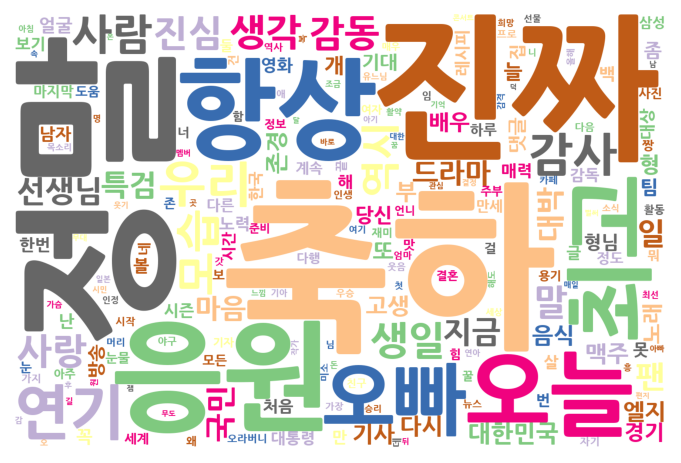

In [19]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumGothicExtraBold.ttf', 
                      background_color='white',
                      colormap = "Accent_r", 
                      width=1500, 
                      height=1000).generate_from_frequencies(count) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()
# 고유명사는 특검, 연아, 삼성, 엘지, 기아 정도?

- png 이미지 파일로 저장
    - 왼쪽 파일에 올라감 -> 다운로드

In [26]:
wordcloud.to_file('wordcloud_happy2.png')

## 3차 시도 
- 일반명사와 고유명사만 뽑아오기

In [34]:
# 왼쪽 파일에 텍스트 파일 올려 놓고 불러올 수 있다.
file = open('one_off_conversation_happy_for_konlpy.txt','r')

lists = file.readlines()

file.close()

lists

['오라버니 해피투게더 봤어요\n',
 '우리 모두 LG 선수들이 선전할 수 있게 기를 넣어줍시다\n',
 '웃긴 거 알죠\n',
 '덕분에 주방에서 요리하는 게 엄청 좋아졌어요\n',
 '마지막 순간 손가락으로 총을 만들어 쏘실 때에는 제가 직접 맞는 것 같습니다\n',
 '어떻게 여성 요리사보다 더 인기가 많으신지 저도 늘 반찬 만들 때 따라 하고 있답니다\n',
 '우리에게 맛있는 음식을 전하시는 맥주 부님 당신 멋져\n',
 '활동 혜택으로 오션월드 입장권 2매까지 주는 폴 인 러브\n',
 '그리고 100일도 축하해요\n',
 '응원합니다 그리고 사랑합니다 파이팅\n',
 '형님이 올해 우리 팀으로 온다고 해서 얼마나 기뻤는지 몰라요\n',
 '예 500일 축하해요\n',
 '생일 진심으로 축하해요\n',
 '축하\n',
 '요리가 차암쉽쥬\n',
 '10년 뒤 손 편지 쓰고 꼭 이 감회도 갈게요\n',
 '요리의 매력에 빠졌어요\n',
 '300일 너무너무 축하해요\n',
 '항상 밝은 에너지 덕분에 힘이 납니다\n',
 '대단하신 우리 선생님 파이팅요\n',
 '파이팅\n',
 '제일처럼 기쁘고 좋은데\n',
 '생일 축하해요\n',
 '덕분에 요리가 즐거워요\n',
 '800일 축하해요\n',
 '이런 오늘 신문을 보니 엘지가 올 시즌을 포기한다고 나왔더라고요\n',
 '내일 생일이라 한번 가보려고요\n',
 '너무너무 좋아요\n',
 '역시 프로입니다\n',
 '1위 한 것 너무 축하해요♡\n',
 '앞으로 언제나 함께 있을게요\n',
 '건강한 하루요\n',
 '하루에 2만 명 넘고 너무 좋겠네요\n',
 '7500일 축하해요\n',
 '축하드려요\n',
 '그게 훨씬 귀엽고 더 어려 보여요 진짜\n',
 '정말 행복해요\n',
 '딸 바보 되시겠네요\n',
 '파이팅\n',
 '파이팅\n',
 '항상 좋은 일 있길 바랄게요\n',
 '오빠의 유쾌한 웃음소리가 들리는듯하네요\n',
 '선수 파이팅\n',
 '매번 좋은 정보감사합니다\n',
 

In [35]:
twitter = Twitter() 
morphs = [] 
 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('오라버니', 'Noun'), ('해피투게더', 'Noun'), ('봤어요', 'Verb'), ('\n', 'Foreign')], [('우리', 'Noun'), ('모두', 'Noun'), ('LG', 'Alpha'), ('선수', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('선전', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있게', 'Adjective'), ('기를', 'Verb'), ('넣어', 'Verb'), ('줍시다', 'Verb'), ('\n', 'Foreign')], [('웃긴', 'Verb'), ('거', 'Noun'), ('알', 'Noun'), ('죠', 'Josa'), ('\n', 'Foreign')], [('덕분', 'Noun'), ('에', 'Josa'), ('주방', 'Noun'), ('에서', 'Josa'), ('요리', 'Noun'), ('하는', 'Verb'), ('게', 'Noun'), ('엄청', 'Adverb'), ('좋아졌어요', 'Verb'), ('\n', 'Foreign')], [('마지막', 'Noun'), ('순간', 'Noun'), ('손가락', 'Noun'), ('으로', 'Josa'), ('총', 'Noun'), ('을', 'Josa'), ('만들어', 'Verb'), ('쏘실', 'Verb'), ('때', 'Noun'), ('에는', 'Josa'), ('제', 'Noun'), ('가', 'Josa'), ('직접', 'Noun'), ('맞는', 'Verb'), ('것', 'Noun'), ('같습니다', 'Adjective'), ('\n', 'Foreign')], [('어떻게', 'Adjective'), ('여성', 'Noun'), ('요리사', 'Noun'), ('보다', 'Josa'), ('더', 'Noun'), ('인기', 'Noun'), ('가', 'Josa'), ('많으', 'Adjective'), ('신지', 'Noun'), ('저'

In [36]:
noun_list3=[] 
for sentence in morphs :
    for word, tag in sentence : 
        if tag in ['NNG','NNP'] : 
            noun_list3.append(word) 
print(noun_list3)

[]


In [37]:
count3 = Counter(noun_list3)
print(count3)

Counter()
